In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read data

In [5]:
data = pd.read_csv('/home/vignesh/Documents/MachineLearningProject/LoanPrediction/train_ctrUa4K.csv')

In [6]:
test_data = pd.read_csv('/home/vignesh/Documents/MachineLearningProject/LoanPrediction/test_lAUu6dG.csv')

In [7]:
test_data['Total_income'] = test_data.ApplicantIncome + test_data.CoapplicantIncome

In [8]:
data['Total_income'] = data.ApplicantIncome + data.CoapplicantIncome

In [9]:
data[0:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


In [10]:
# Describe data

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [12]:
# Correlation

In [13]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.015109
Total_income,0.893037,0.342781,0.624621,-0.069948,-0.015109,1.000000


In [14]:
# count nan

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64

In [16]:
# distribution of Loan_Status

In [17]:
data.groupby(['Loan_Status']).size()

Loan_Status
N    192
Y    422
dtype: int64

In [18]:
# distribution of gender

In [19]:
data.groupby(['Gender']).size()

Gender
Female    112
Male      489
dtype: int64

In [20]:
# distribution of Married

In [21]:
data.groupby(['Married']).size()

Married
No     213
Yes    398
dtype: int64

In [22]:
# distribution of Dependents

In [23]:
data.groupby(['Dependents']).size()

Dependents
0     345
1     102
2     101
3+     51
dtype: int64

In [24]:
# distribution of Education

In [25]:
data.groupby(['Education']).size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [26]:
# distribution of Self_Employed

In [27]:
data.groupby(['Self_Employed']).size()

Self_Employed
No     500
Yes     82
dtype: int64

In [28]:
# distribution of Property_Area

In [29]:
data.groupby(['Property_Area']).size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [30]:
print(pd.crosstab(data['Gender'], data['Loan_Status']))
print('----------')
print(pd.crosstab(data['Married'], data['Loan_Status']))
print('----------')
print(pd.crosstab(data['Dependents'], data['Loan_Status']))
print('----------')
print(pd.crosstab(data['Education'], data['Loan_Status']))
print('----------')
print(pd.crosstab(data['Self_Employed'], data['Loan_Status']))
print('----------')
print(pd.crosstab(data['Property_Area'], data['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
----------
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
----------
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
----------
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
----------
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
----------
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


In [31]:
data.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899,7323.885417
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818,6888.585118


In [32]:
data.groupby(['Loan_Status']).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,3833.5,268.0,129.0,360.0,1.0,5289.5
Y,3812.5,1239.5,126.0,360.0,1.0,5439.0


In [33]:
data[data.CoapplicantIncome>0].groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,4188.729167,3755.614583,167.206522,337.677419,0.500000,7944.343750
Y,3916.351020,2591.452735,139.899582,345.439331,0.981982,6507.803755


In [34]:
data[data.CoapplicantIncome>0].groupby(['Loan_Status']).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,3383,2293.5,149.5,360.0,0.5,6088.0
Y,3200,2118.0,129.0,360.0,1.0,5502.0


In [35]:
data[data.CoapplicantIncome<=0].groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,6703.427083,0.0,134.696629,350.451613,0.582418,6703.427083
Y,7415.655367,0.0,150.401163,335.108571,0.981595,7415.655367


In [36]:
data[data.CoapplicantIncome<=0].groupby(['Loan_Status']).median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
Loan_Status,,,,,,
N,4594.5,0.0,113.0,360.0,1.0,4594.5
Y,5050.0,0.0,123.0,360.0,1.0,5050.0


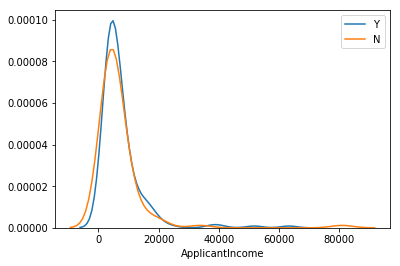

In [37]:
sns.distplot(data[(data.CoapplicantIncome<=0) & (data.Loan_Status=='Y')].ApplicantIncome, hist=False, label='Y')
sns.distplot(data[(data.CoapplicantIncome<=0) & (data.Loan_Status=='N')].ApplicantIncome, hist=False, label='N')

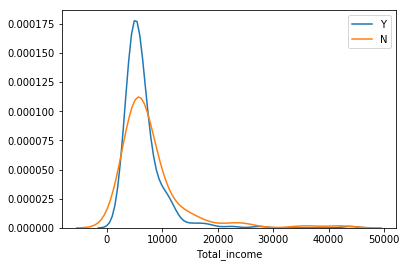

In [38]:
sns.distplot(data[(data.CoapplicantIncome>0) & (data.Loan_Status=='Y')].Total_income, hist=False, label='Y')
sns.distplot(data[(data.CoapplicantIncome>0) & (data.Loan_Status=='N')].Total_income, hist=False, label='N')

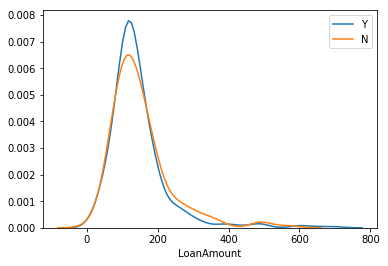

In [39]:
sns.distplot(data[(data.Loan_Status=='Y') & (~data.LoanAmount.isnull())].LoanAmount, hist=False, label='Y')
sns.distplot(data[(data.Loan_Status=='N') & (~data.LoanAmount.isnull())].LoanAmount, hist=False, label='N')

In [40]:
data[data.CoapplicantIncome>0].groupby(['Loan_Status']).size()

Loan_Status
N     96
Y    245
dtype: int64

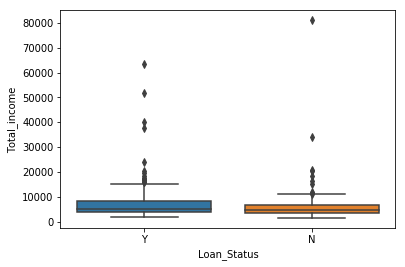

In [41]:
sns.boxplot(data[data.CoapplicantIncome<=0]['Loan_Status'], data[data.CoapplicantIncome<=0]['Total_income'])

In [42]:
data[data.CoapplicantIncome<=0].groupby(['Loan_Status']).size()

Loan_Status
N     96
Y    177
dtype: int64

In [43]:
pd.crosstab(data['Gender'], data['Married'])

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


In [44]:
pd.crosstab(data['Education'], data['Married'])

Married,No,Yes
Education,,
Graduate,168,309
Not Graduate,45,89


In [45]:
pd.crosstab(data['Dependents'], data['Married'])

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [46]:
data[data.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,4570.0
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,4758.0
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,10047.0


In [47]:
from sklearn.impute import SimpleImputer

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

In [49]:
imp = SimpleImputer(strategy="most_frequent")

In [50]:
print(imp.fit_transform(data[['Gender']]))

[['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Female']
 ['Female']
 ['Female']
 ['Female']
 ['Female']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']
 ['Male']
 ['Female']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Male']
 ['Female']


In [51]:
# transformer = ColumnTransformer(transformers=[('cat', LabelEncoder(), [0, 1])])

In [52]:
# Create features and targets

In [128]:
# X, y = data.drop(['Loan_Status', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1), data['Loan_Status']

In [137]:
X, y = data[['Credit_History']], data['Loan_Status']

In [138]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X, y = ros.fit_resample(X, y)

In [139]:
y = y.apply(lambda x : 1 if x=='Y' else 0)

In [140]:
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns

In [141]:
# Create categorical pipeline

In [142]:
# categorical_features = Pipeline(steps=[('cat_imp', SimpleImputer(strategy='most_frequent'))
#                                        , ('cat', OneHotEncoder())])

In [143]:
categorical_features = Pipeline(steps=[('cat_imp', SimpleImputer(strategy='most_frequent')),
                                      ('cat', OrdinalEncoder())])

In [144]:
# Create numerical pipeline

In [145]:
numeric_features = Pipeline(steps=[('num_imp', SimpleImputer(strategy='median')),
                                   ('num', MinMaxScaler())])

In [146]:
# ColumnTransformer

In [155]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_features, numerical_ix),
#         ('cat', categorical_features, categorical_ix)])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_features, categorical_ix)])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', numeric_features, numerical_ix)])


In [156]:
preprocessor.fit(X, y)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('num', MinMaxScaler())]),
                                 Index(['Credit_History'], dtype='object'))])

In [157]:
# Create pipeline for combining preprocessing and classification

In [170]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [171]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num',
                                                                   MinMaxScaler())]),
                                                  Index(['Credit_History'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
# Conduct 5-fold cross validation

In [174]:
scores = cross_val_score(clf, X, y, cv=5)

In [175]:
scores

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [176]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num',
                                                                   MinMaxScaler())]),
                                                  Index(['Credit_History'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [164]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [165]:
param_grid = {'classifier__max_depth': [5, 10, 15, 20], 
              'classifier__n_estimators' : [5, 10, 15, 20],
              }

# param_grid = {'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
#               }

In [166]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=5))])

# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', svm.SVC(kernel='sigmoid'))])

In [109]:
scores = cross_val_score(clf, X, y, cv=6, scoring='f1')

In [117]:
scores

array([0.66666667, 0.53846154, 0.51428571, 0.54014599, 0.5984252 ,
       0.62162162])

In [111]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [112]:
# search = GridSearchCV(clf, param_grid, n_jobs=-1)
# search.fit(X, y)
# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)

In [113]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=5, n_estimators=15, oob_score=True))])

In [114]:
clf.fit(X,y)

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=15,
                                        oob_score=True))])

In [115]:
clf.predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [120]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_income'],
      dtype='object')

In [121]:
test_data['Loan_Status'] = ['Y' if x==1.0 else 'N' for x in 
                            clf.predict(test_data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1))]

In [180]:
test_data['Loan_Status'] = ['Y' if x==1.0 else 'N' for x in 
                            clf.predict(test_data[['Credit_History']])]

In [181]:
test_data[['Loan_ID', 'Loan_Status']].to_csv('output.csv', header=1, index=False)

In [179]:
clf.predict(test_data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1))

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,